In [40]:
from cta_plots.mc.spectrum import CTAElectronSpectrum
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [8]:
spec = CTAElectronSpectrum()

In [28]:
E = 0.1*u.TeV 
s = spec.flux(E)*E**3
s.to('TeV2 m-2 s-1 sr-1')

<Quantity 0.00010102 TeV2 / (m2 s sr)>

In [41]:
norm.pdf(1)

0.24197072451914337

In [123]:
def function_aswg_report(energy):
    I_0 = 2.385E-9/(u.cm**2 *u.s * u.TeV * u.sr)
    gamma = 3.43
    mu = -1.101
    sigma = .741
    f = 2.000
    
    gauss = norm.pdf(np.log(energy/u.TeV), loc=mu, scale=sigma)
    flux = I_0 * (energy/(1*u.TeV))**(-gamma + 0.1)
    flux *= 1 + (f * np.exp(gauss) - 1)
    return flux

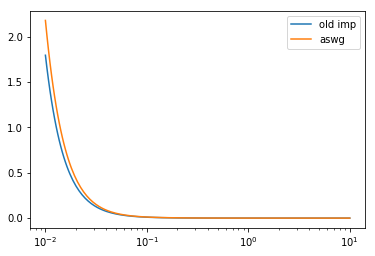

In [126]:
energies = np.logspace(-2, 1, 200) * u.TeV
power = 1

f = energies**power * spec.flux(energies)
plt.plot(energies.value, f.to(' m-2 s-1 sr-1').value, label='old imp')

f = energies**power * function_aswg_report(energies)

plt.plot(energies.value, f.to(' m-2 s-1 sr-1').value, label='aswg')

plt.legend()
plt.xscale('log')
# plt.ylim([0, 0.25E-3])
# plt.yscale('log')